## Aluno: 

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [7]:
# resposta 1
import pandas as pd
house_prices = pd.read_csv('house_prices.csv', sep=';')
print(house_prices.head(3))
house_prices.drop_duplicates()
house_prices.fillna(method ='ffill', inplace = True)

   tamanho  n_quartos  idade   preco
0   2104.0        3.0   45.0  399900
1   2104.0        3.0   45.0  399900
2   1600.0        3.0   30.0  329900


## 2) Há outliers no data set? Se sim, trate-os de forma adequada. Use box-plots para confirmar a presença de outliers

C:\Users\lenno\Anaconda3\envs\complete\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
C:\Users\lenno\Anaconda3\envs\complete\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


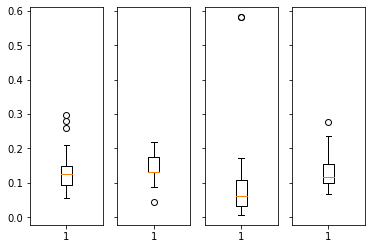

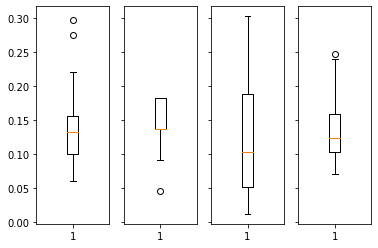

In [8]:
# resposta 2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from scipy import stats

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.boxplot(normalize(house_prices['tamanho'][:,np.newaxis], axis=0).ravel())
ax2.boxplot(normalize(house_prices['n_quartos'][:,np.newaxis], axis=0).ravel())
ax3.boxplot(normalize(house_prices['idade'][:,np.newaxis], axis=0).ravel())
ax4.boxplot(normalize(house_prices['preco'][:,np.newaxis], axis=0).ravel())
fig1.show()

house_prices = house_prices[(np.abs(stats.zscore(house_prices)) < 3).all(axis=1)]

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.boxplot(normalize(house_prices['tamanho'][:,np.newaxis], axis=0).ravel())
ax2.boxplot(normalize(house_prices['n_quartos'][:,np.newaxis], axis=0).ravel())
ax3.boxplot(normalize(house_prices['idade'][:,np.newaxis], axis=0).ravel())
ax4.boxplot(normalize(house_prices['preco'][:,np.newaxis], axis=0).ravel())
fig1.show()

## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [9]:
# resposta 3
house_prices['n_andares'] = house_prices.apply(lambda x: np.random.randint(1, 3), axis=1)
print(house_prices.head(3))

   tamanho  n_quartos  idade   preco  n_andares
0   2104.0        3.0   45.0  399900          1
1   2104.0        3.0   45.0  399900          2
2   1600.0        3.0   30.0  329900          1


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

C:\Users\lenno\Anaconda3\envs\complete\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


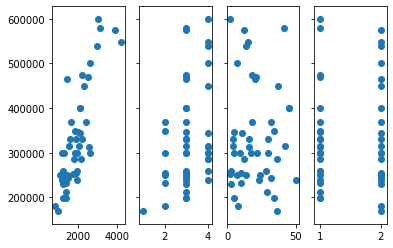

In [10]:
# resposta 4
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.scatter(house_prices['tamanho'], house_prices['preco'])
ax2.scatter(house_prices['n_quartos'], house_prices['preco'])
ax3.scatter(house_prices['idade'], house_prices['preco'])
ax4.scatter(house_prices['n_andares'], house_prices['preco'])
fig1.show()

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [11]:
# resposta 5
from sklearn.model_selection import train_test_split
feature_col = ['tamanho','n_quartos','n_andares']
meta_col = ['preco']
X = house_prices[feature_col].values
y = house_prices[meta_col].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [13]:
# resposta 6
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())
y_pred_train = lr_model.predict(X_train)
mean_squared_error(y_train,y_pred_train)

2931220027.3249826

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? Retorne um DataFrame contendo valor predito na primeira coluna e valor verdadeiro na segunda

In [19]:
# resposta 7
y_pred_test = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
pd.DataFrame(data={'v_pred': [y_pred_test], 'v_real': [y_test]})

,v_pred,v_real
0,"[347343.37291257887, 338339.86010025034, 39002...","[[475000], [287000], [469000], [299000], [2499..."
